# Heun's Method

**A solver of order 2**

We use the average of current speed / position and speed / position after step *h*.


$\vec{x}(h)=\vec{x}(0)+h\vec{v}(0)=\vec{x}_E$  
$\vec{v}(h)=\vec(0)+h\frac{\vec{F}(0, \vec{x}(0))}{m}=\vec{v}_E$ 
 
 ⬇️  
 
$\vec{x}(h)=\vec{x}(0)+h \frac{\vec{v}(0)+\vec{v}_{E}}{2}=\vec{x}_H$  
$\vec{v}(h)=\vec{v}(0)+h \frac{\vec{F}(0, \vec{x}_0)+\vec{F}(h, \vec{x}_{E})}{2 m}$  

**Note:** 
$\frac{\vec{F}(0, \vec{x}_0)+\vec{F}(h, \vec{x}_{E})}{2 m}=\frac{\vec{accel}_0+\vec{accel}_h}{2}$

## Local Transition Error

$LTE_E=||\vec{x}_E-\vec{x}_H||+T||\vec{v}_E-\vec{v}_H||=Ch^2_{old}$  
$Tolerance=||\vec{x}_E-\vec{x}_H||+T||\vec{v}_E-\vec{v}_H||$  
$Ch^2_{new} \approx tolerance$  
$C = \frac{LTE_E}{h^2_{old}}$  
$h_{new}=h_{old}\sqrt{\frac{tolerance}{LTE}}$  

Where T = time of the simulation. To account for $m$ vs $\frac{m}{s}$

After we do a step with the olde step size $h_{old}$ we get an estimate for a perfect step size $h_{new}$ for Euler's method. We can keep doing that as we go and the step size will be adjusted automatically. The solution will be stepping at proper step sizes, for examepl when we are getting close to a planet the step size will become smaller.

In [12]:
# QUIZ
#
# Implement Heun's Method in the function below, 
# building off of the Forward Euler method as a 
# base. The resulting diagram will show the 
# errors in comparison.

import math
from udacityplots import *
import numpy
import numpy as np

total_time = 24. * 3600. # s
g = 9.81 # m / s2
earth_mass = 5.97e24 # kg
gravitational_constant = 6.67e-11 # N m2 / kg2
radius = (gravitational_constant * earth_mass * total_time**2. / 4. / math.pi ** 2.) ** (1. / 3.)
speed = 2.0 * math.pi * radius / total_time

# These are used to keep track of the data we want to plot
h_array = []
euler_error_array = []
heuns_error_array = []

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth located at origin
    return gravitational_constant * earth_mass / numpy.linalg.norm(vector_to_earth)**3 * vector_to_earth



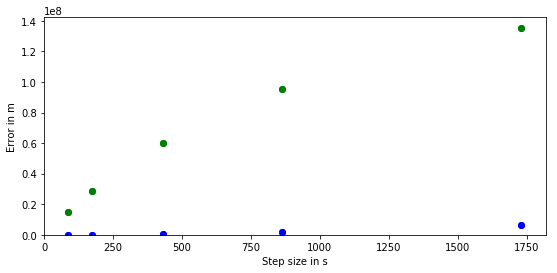

In [14]:
def heuns_method(num_steps):
    ###Original Euler Method
    h = total_time / num_steps

    x = numpy.zeros([num_steps + 1, 2]) # m
    v = numpy.zeros([num_steps + 1, 2]) # m / s

    x[0, 0] = radius
    v[0, 1] = speed

    for step in range(num_steps):
        x[step + 1] = x[step] + h * v[step]
        v[step + 1] = v[step] + h * acceleration(x[step])

    error = numpy.linalg.norm(x[-1] - x[0])
    h_array.append(h)
    euler_error_array.append(error)
    ###End Original Euler Method

    ###Heun's Method
    for step in range(num_steps):
        x_e = x[step] + h * v[step]
        v_e = v[step] + h * acceleration(x[step])
        x[step+1] = x[step] + h * ((v[step]+v_e)/2.)
        v[step+1] = v[step] + h * ((acceleration(x[step])+acceleration(x_e))/2.)

    error = numpy.linalg.norm(x[-1] - x[0])
    heuns_error_array.append(error)

    ###End Heun's Method

    return x, v, error

for num_steps in [50, 100, 200, 500, 1000]:
    x, v, error = heuns_method(num_steps) #Check x, v, error


@show_plot
def plot_me():
    matplotlib.pyplot.scatter(h_array, euler_error_array, c = 'g')
    matplotlib.pyplot.scatter(h_array, heuns_error_array, c = 'b')
    matplotlib.pyplot.xlim(left = 0.)
    matplotlib.pyplot.ylim(bottom = 0.)
    axes = matplotlib.pyplot.gca()
    axes.set_xlabel('Step size in s')
    axes.set_ylabel('Error in m')
    
plot_me()

## Local Transition Error

$LTE_E=||\vec{x}_E-\vec{x}_H||+T||\vec{v}_E-\vec{v}_H||=Ch^2_{old}$  
$Tolerance=||\vec{x}_E-\vec{x}_H||+T||\vec{v}_E-\vec{v}_H||$  
$Ch^2_{new} \approx tolerance$  
$C = \frac{LTE_E}{h^2_{old}}$  
$h_{new}=h_{old}\sqrt{\frac{tolerance}{LTE}}$  

Where T = time of the simulation. To account for $m$ vs $\frac{m}{s}$

After we do a step with the olde step size $h_{old}$ we get an estimate for a perfect step size $h_{new}$ for Euler's method. We can keep doing that as we go and the step size will be adjusted automatically. The solution will be stepping at proper step sizes, for examepl when we are getting close to a planet the step size will become smaller.

<tr>
<td> <img src="media/hnew_old.png" alt="Drawing" style="width: 450px;"/> </td>
</tr>

In [16]:
# QUIZ
#
# Implement adaptive step size in the 
# below function.

import math
from udacityplots import *
import numpy
import numpy as np

total_time = 12500. # s
g = 9.81 # m / s2
earth_mass = 5.97e24 # kg
gravitational_constant = 6.67e-11 # N m2 / kg2

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth located at origin
    return gravitational_constant * earth_mass / numpy.linalg.norm(vector_to_earth)**3 * vector_to_earth

In [ ]:
@show_plot
def orbit():
    x = numpy.zeros(2) # m
    v = numpy.zeros(2) # m / s
    x[0] = 15e6
    x[1] = 1e6    
    v[0] = 2e3
    v[1] = 4e3
    matplotlib.pyplot.scatter(x[0], x[1], s = 4)

    current_time = 0. # s
    h = 100. # s
    h_new = h # s, will store the adaptive step size of the next step
    tolerance = 5e5 # m

    while current_time < total_time:
        acceleration0 = acceleration(x)    
        xE = x + h * v
        vE = v + h * acceleration0
        xH = x + h * 0.5 * (v + vE)
        vH = v + h * 0.5 * (acceleration0 + acceleration(xE))
        x = xH
        v = vH

        ###Your code here.
        
        matplotlib.pyplot.scatter(x[0], x[1], s = 1)
        current_time += h
        h = h_new
    matplotlib.pyplot.axis('equal')
    matplotlib.pyplot.scatter(0., 0.) 
    axes = matplotlib.pyplot.gca()
    axes.set_xlabel('Longitudinal position in m')
    axes.set_ylabel('Lateral position in m')
    return x, v

x, v = orbit()